In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df_original = pd.read_csv("C:/Users/Asus/Desktop/Data Science/Coursera - Data Science/DataSets Downloaded/house_sales.csv")

In [3]:
df = df_original.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.drop(["id", "date"], inplace=True, axis=1)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
for column in df.columns:
    if df[column].isnull().any():
        print("The {} has {} null values".format(column, df[column].isnull().sum()))

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x219f5bf20c8>,
 'caps': [<matplotlib.lines.Line2D at 0x219f9cf1dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x219f9ce4f08>],
 'medians': [<matplotlib.lines.Line2D at 0x219f9cfdfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x219f9cfdb88>],
 'means': []}

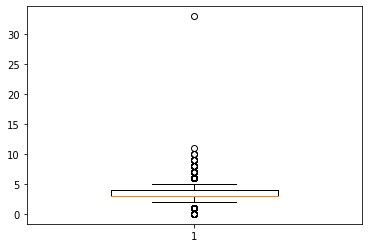

In [10]:
plt.boxplot(df['bedrooms'], widths=0.5)

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
df.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
# removing rows having bedrooms 33 and 11 sonce they are outliers
df.drop(df[df['bedrooms']==33].index, inplace=True, axis=0)
df.drop(df[df['bedrooms']==11].index, inplace=True, axis=0)

In [14]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
Name: bedrooms, dtype: int64

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400844e+05,3.369118,2.114733,2079.878442,1.510786e+04,1.494308,0.007542,0.234325,3.409375,7.656934,1788.397020,291.481421,1971.008699,84.317570,98077.937347,47.560047,-122.213884,1986.609088,12769.190320
std,3.671435e+05,0.906518,0.770171,918.456742,4.142232e+04,0.539992,0.086521,0.766350,0.650677,1.175496,828.103196,442.586196,29.372103,401.486212,53.506890,0.138567,0.140829,685.397631,27305.336262
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315983,0.525166,0.702066,0.089663,0.256818,0.266371,0.397299,0.036335,0.667451,0.605601,0.323817,0.054022,0.126515,-0.053208,0.306998,0.021635,0.585412,0.082451
bedrooms,0.315983,1.000000,0.529594,0.592060,0.032956,0.181020,-0.006588,0.082183,0.025765,0.367323,0.491122,0.309729,0.160143,0.017802,-0.157555,-0.010547,0.134518,0.403613,0.030564
bathrooms,0.525166,0.529594,1.000000,0.754650,0.087751,0.500621,0.063749,0.187754,-0.124918,0.665033,0.685329,0.283763,0.506162,0.050509,-0.203894,0.024596,0.223097,0.568699,0.087188
sqft_living,0.702066,0.592060,0.754650,1.000000,0.172837,0.353909,0.103823,0.284628,-0.058677,0.762751,0.876594,0.435048,0.318152,0.055168,-0.199452,0.052555,0.240270,0.756486,0.183298
sqft_lot,0.089663,0.032956,0.087751,0.172837,1.000000,-0.005200,0.021602,0.074704,-0.008942,0.113611,0.183518,0.015301,0.053057,0.007699,-0.129566,-0.085676,0.229511,0.144595,0.718555
floors,0.256818,0.181020,0.500621,0.353909,-0.005200,1.000000,0.023699,0.029445,-0.263686,0.458208,0.523852,-0.245722,0.489427,0.006126,-0.059127,0.049657,0.125440,0.279902,-0.011270
waterfront,0.266371,-0.006588,0.063749,0.103823,0.021602,0.023699,1.000000,0.401857,0.016663,0.082772,0.072076,0.080595,-0.026174,0.092952,0.030289,-0.014270,-0.041920,0.086459,0.030701
view,0.397299,0.082183,0.187754,0.284628,0.074704,0.029445,0.401857,1.000000,0.046022,0.251309,0.167653,0.276973,-0.053482,0.104037,0.084842,0.006170,-0.078430,0.280425,0.072567
condition,0.036335,0.025765,-0.124918,-0.058677,-0.008942,-0.263686,0.016663,0.046022,1.000000,-0.144650,-0.158118,0.174081,-0.361463,-0.060496,0.002988,-0.015049,-0.106457,-0.092757,-0.003381
grade,0.667451,0.367323,0.665033,0.762751,0.113611,0.458208,0.082772,0.251309,-0.144650,1.000000,0.755953,0.168433,0.446942,0.014540,-0.184841,0.114111,0.198334,0.713193,0.119235


In [17]:
import seaborn as sns

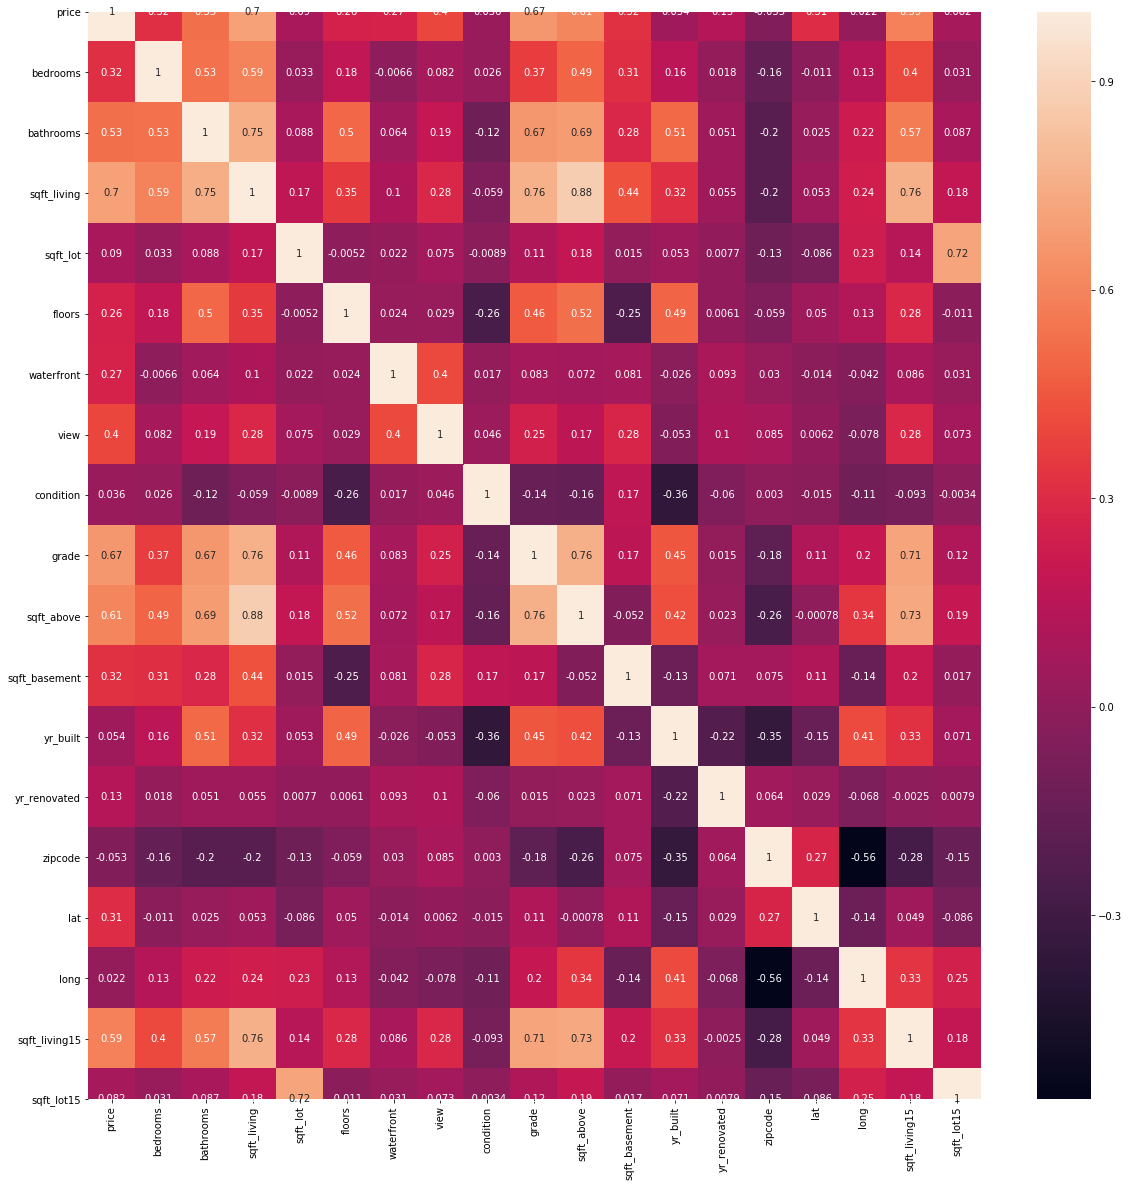

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns, linewidths=0, annot=df.corr())

In [19]:
df1 = df.copy()

In [20]:
cols = list(df1.columns)
price_col = cols.pop(cols.index('price'))
price_col
df1 = df1[cols+['price']]

In [21]:
df1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [22]:
corr_matrix = df1.corr()
type(corr_matrix)
sort = corr_matrix.sort_values('price',ascending=False)

In [23]:
sort[['price']]

,price
price,1.000000
sqft_living,0.702066
grade,0.667451
sqft_above,0.605601
sqft_living15,0.585412
bathrooms,0.525166
view,0.397299
sqft_basement,0.323817
bedrooms,0.315983
lat,0.306998


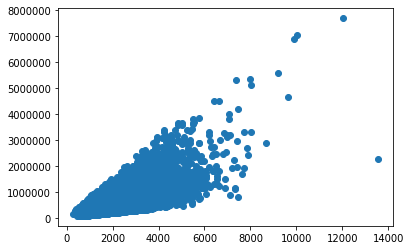

In [24]:
plt.scatter(df1['sqft_living'], df1['price'])

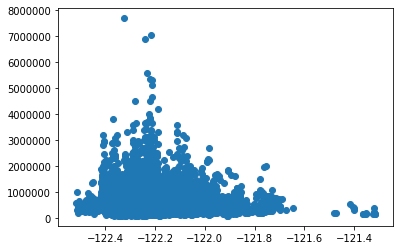

In [25]:
plt.scatter(df1['long'], df1['price'])

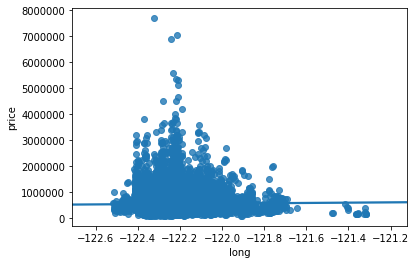

In [26]:
sns.regplot(df1['long'], df1['price'])

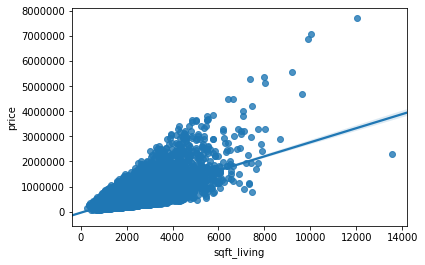

In [27]:
sns.regplot(df1['sqft_living'], df1['price'])

In [28]:
from numpy import cov
covariance = cov(df1['long'],df1['price'])
covariance

array([[1.98327940e-02, 1.11862428e+03],
       [1.11862428e+03, 1.34794371e+11]])

In [29]:
df['waterfront'].value_counts()

0    21448
1      163
Name: waterfront, dtype: int64

In [30]:
df['view'].value_counts()

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [31]:
df['condition'].value_counts()

3    14030
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

In [32]:
#ANOVA
grouped_test2=df1[['waterfront', 'price']].groupby(['waterfront'])
grouped_test2.head()

,waterfront,price
0,0,221900
1,0,538000
2,0,180000
3,0,604000
4,0,510000
49,1,1350000
230,1,655000
246,1,2400000
264,1,369900
300,1,3075000


In [33]:
from scipy.stats import f_oneway
f_val, p_val = f_oneway(grouped_test2.get_group(0)['price'], grouped_test2.get_group(1)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 1650.329578279241 , P = 0.0


In [34]:
from scipy.stats import pearsonr
corr, p = pearsonr(df1['long'], df1['price'])
print("correlation: ", corr)
print("p-value: ", p)

correlation:  0.021634975730727674
p-value:  0.0014693140788605403


In [35]:
pearson_coef, p_value = pearsonr(df1['yr_renovated'], df1['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef, "\nP-value of P: ", p_value)

The Pearson Correlation Coefficient:  0.126515379732808 
P-value of P:  8.269950001778953e-78


In [36]:
pearson_coef, p_value = pearsonr(df1['long'], df1['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef, "\nP-value of P: ", p_value)

The Pearson Correlation Coefficient:  0.021634975730727674 
P-value of P:  0.0014693140788605403


In [37]:
features1 = df1.columns.to_list()[:-1]
features1

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [38]:
pearson_coef = []
p_values = []
for column in features1:
    coef, p_val = pearsonr(df1[column], df1['price'])
    pearson_coef.append(coef)
    p_values.append(p_val)

In [39]:
dict1 = {"Features" : features1, "Pearson Coeffs" : pearson_coef, "P-values" : p_values }

In [40]:
pd.DataFrame(dict1).sort_values(by="Pearson Coeffs", ascending=False,)

,Features,Pearson Coeffs,P-values
2,sqft_living,0.702066,0.000000e+00
8,grade,0.667451,0.000000e+00
9,sqft_above,0.605601,0.000000e+00
16,sqft_living15,0.585412,0.000000e+00
1,bathrooms,0.525166,0.000000e+00
6,view,0.397299,0.000000e+00
10,sqft_basement,0.323817,0.000000e+00
0,bedrooms,0.315983,0.000000e+00
14,lat,0.306998,0.000000e+00
5,waterfront,0.266371,0.000000e+00


In [41]:
#taking part of columns and validating the accuracy
features_1 = df1[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront']]

In [42]:
features_1.shape

(21611, 10)

In [43]:
label = df['price']
label.shape

(21611,)

In [44]:
featuresall = df1.iloc[:,:-2]
featuresall.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [45]:
df[featuresall.columns.to_list()[0]].describe()

count    21611.000000
mean         3.369118
std          0.906518
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
bruteScores = []
for i in range(1,30):
    x_train,  x_test, y_train, y_test = train_test_split(featuresall, label, test_size = 0.3, random_state=i)
    
    LinReg_model = LinearRegression().fit(x_train, y_train)
    
    test_score = LinReg_model.score(x_test,y_test)
    train_score = LinReg_model.score(x_train,y_train)
    
    if test_score > train_score:
         bruteScores.append((train_score, test_score, i))
             
print(pd.DataFrame(bruteScores, columns=["train score", 'test score', 'random state']))

    train score  test score  random state
0      0.699241    0.700850             2
1      0.698358    0.702998             3
2      0.691951    0.716614             5
3      0.697673    0.704139             9
4      0.696687    0.707181            11
5      0.698771    0.701058            13
6      0.696401    0.706963            14
7      0.698508    0.700331            15
8      0.696411    0.707148            16
9      0.698744    0.701313            17
10     0.698474    0.702907            18
11     0.698219    0.701555            19
12     0.698793    0.701422            20
13     0.699587    0.700008            21
14     0.695849    0.708424            26
15     0.698558    0.702436            29


In [47]:
#correlation b/w features
for i in featuresall.columns.to_list():
    for j in featuresall.columns.to_list():
        correlation = df[i].corr(df[j])
        if correlation > 0.95 and correlation != 1:
            print ("Corelated columns: {} {}".format(i,j))

Corelated columns: floors floors
Corelated columns: condition condition


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [49]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(featuresall)

In [50]:
poly_features.shape

(21611, 171)

In [51]:
featuresall.shape

(21611, 17)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
bruteScores = []
for i in range(1,30):
    x_train,  x_test, y_train, y_test = train_test_split(poly_features, label, test_size = 0.3, random_state=i)
    
    LinReg_model = LinearRegression().fit(x_train, y_train)
    
    test_score = LinReg_model.score(x_test,y_test)
    train_score = LinReg_model.score(x_train,y_train)
    
    if test_score > train_score:
         bruteScores.append((train_score, test_score, i))
             
print(pd.DataFrame(bruteScores, columns=["train score", 'test score', 'random state']))

   train score  test score  random state
0     0.820030    0.837649             1
1     0.825567    0.826844             2
2     0.823243    0.832218             5
3     0.825852    0.826239             6
4     0.823355    0.831292            12
5     0.824239    0.829002            13
6     0.821896    0.830251            15
7     0.824023    0.832546            26


In [53]:
from sklearn.decomposition import PCA

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features = sc.fit_transform(featuresall)

In [55]:
principalComponents = PCA(n_components=10)
principalComponents.fit(scaled_features,label)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
PCA_Var_ratio = principalComponents.explained_variance_ratio_.tolist()

In [57]:
sum(PCA_Var_ratio)

0.8887060198548978

In [58]:
PCA_features = principalComponents.transform(featuresall)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
bruteScores = []
for i in range(1,30):
    x_train,  x_test, y_train, y_test = train_test_split(PCA_features, label, test_size = 0.3, random_state=i)
    
    LinReg_model = LinearRegression().fit(x_train, y_train)
    
    test_score = LinReg_model.score(x_test,y_test)
    train_score = LinReg_model.score(x_train,y_train)
    
    if test_score > train_score:
         bruteScores.append((train_score, test_score, i))
             
print(pd.DataFrame(bruteScores, columns=["train score", 'test score', 'random state']))

    train score  test score  random state
0      0.664020    0.667973             2
1      0.664934    0.665850             3
2      0.656037    0.685246             5
3      0.662647    0.670983             9
4      0.661740    0.673868            11
5      0.662240    0.670846            13
6      0.660719    0.675732            14
7      0.661817    0.673008            16
8      0.663997    0.666214            19
9      0.663628    0.668997            21
10     0.661329    0.674228            26
11     0.664268    0.667416            29


#Cross Validation
from sklearn.model_selection import KFold, cross_val_score # import KFold

kfold = KFold(n_splits=20) # Define the split - into 2 folds 
kfold.get_n_splits(poly_features) # returns the number of splitting iterations in the cross-validator
print(kfold) 

for train_index, test_index in kfold.split(poly_features):
    print('train: %s, test: %s' % (train, test))
    X_train, X_test, y_train, y_test = poly_features[train_index], poly_features[test_index], label[train_index], label[test_index]
    print(np.isnan(X_train).sum())
    y_train.replace(to_replace = np.argwhere(np.isnan(y_train), value=np.mean(y_train))   
    print(np.isnan(y_train).sum())
    print(np.isnan(X_test).sum())
    print(np.isnan(y_test).sum())
    LinearRegression().fit(X_train, y_train)
    scores.append(LinearRegression.score(X_test, y_test))

In [60]:
#cross validaion
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LinearRegression(), poly_features, label, cv=5)

In [61]:
print(np.mean(cross_val))

0.812843657112807


In [62]:
#Pipelining 
from sklearn.pipeline import Pipeline
Poly_Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',LinearRegression())]

In [63]:
polypipe = Pipeline(Poly_Input)
polypipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [64]:
polypipe.fit(featuresall, label)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [65]:
y_polypipe = polypipe.predict(featuresall)

In [66]:
y_polypipe[0:3]

array([277145., 594251., 467677.])

In [67]:
polypipe.score(featuresall, label)

0.8285880942324283

In [68]:
Scale_Input=[('scale',StandardScaler()), ('model',LinearRegression())]

In [69]:
scalepipe = Pipeline(Scale_Input)

In [70]:
scalepipe.fit(featuresall, label)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [71]:
y_scalepipe = scalepipe.predict(featuresall)

In [72]:
y_scalepipe[0:5]

array([206892.40378587, 735881.70415959, 381001.57439066, 454511.24484059,
       439400.92863966])

In [73]:
scalepipe.score(featuresall, label)

0.6998671512538212

### Decision tree regressor

In [74]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
x_train,  x_test, y_train, y_test = train_test_split(featuresall, label, test_size = 0.3, random_state=20)

DTR_model = DecisionTreeRegressor().fit(x_train, y_train)

test_score = DTR_model.score(x_test,y_test)
train_score = DTR_model.score(x_train,y_train)

print("Test Score: {}\nTrain Score: {}".format(test_score,train_score))

Test Score: 0.7554172390359857
Train Score: 0.9993920487088334


In [75]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
for i in range(1,30):
    x_train,  x_test, y_train, y_test = train_test_split(featuresall, label, test_size = 0.3, random_state=i)
    
    DTR_model = DecisionTreeRegressor().fit(x_train, y_train)

    test_score = DTR_model.score(x_test,y_test)
    train_score = DTR_model.score(x_train,y_train)
    
    if test_score > train_score:
        print("Test Score: {}\tTrain Score: {}\tRandom State: {}".format(test_score,train_score,i))

### Ridge 

In [76]:
from sklearn.linear_model import Ridge
x_train,  x_test, y_train, y_test = train_test_split(featuresall, label, test_size = 0.3, random_state=20)

Ridge_model = DecisionTreeRegressor().fit(x_train, y_train)

test_score = Ridge_model.score(x_test,y_test)
train_score = Ridge_model.score(x_train,y_train)

print("Test Score: {}\nTrain Score: {}".format(test_score,train_score))

Test Score: 0.7623494757631613
Train Score: 0.9993920487088334


In [77]:
from sklearn.linear_model import Ridge
x_train,  x_test, y_train, y_test = train_test_split(poly_features, label, test_size = 0.3, random_state=20)

Ridge_model = DecisionTreeRegressor().fit(x_train, y_train)

test_score = Ridge_model.score(x_test,y_test)
train_score = Ridge_model.score(x_train,y_train)

print("Test Score: {}\nTrain Score: {}".format(test_score,train_score))

Test Score: 0.6794759287406852
Train Score: 0.9993920487088334


# Evaluation

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
#Selecting the best model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(poly_features, label, test_size = 0.3, random_state=1)
    
LinReg_model = LinearRegression().fit(x_train, y_train)
    
test_score = LinReg_model.score(x_test,y_test)
train_score = LinReg_model.score(x_train,y_train)
    
if test_score > train_score:             
    print('Train Score: {}\nTest Score: {}\nRandom State: {}'.format(train_score, test_score, i))

Train Score: 0.8200303609248386
Test Score: 0.8376493663823241
Random State: 29


In [80]:
LR_prediction = LinReg_model.predict(x_test)

In [81]:
mse = mean_squared_error(y_test, LR_prediction)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  24183153743.720207


In [82]:
from sklearn.metrics import r2_score

In [83]:
r_squared = r2_score(y_test, LR_prediction)
print('The R-square value is: ', r_squared)

The R-square value is:  0.8376493663823241


In [84]:
LinReg_model.score(x_test, y_test)

0.8376493663823241

# Pipeline Evaluation

In [85]:
#Pipelining 
from sklearn.pipeline import Pipeline
Poly_Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',LinearRegression())]

In [86]:
polypipe = Pipeline(Poly_Input)
polypipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [87]:
x_train,  x_test, y_train, y_test = train_test_split(featuresall, label, test_size = 0.3, random_state=1)

In [88]:
polypipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [89]:
y_polypipe = polypipe.predict(x_test)

In [90]:
y_polypipe[0:4]

array([260182.25, 395167.25, 408903.25, 658415.25])

In [93]:
r_squared = r2_score(y_test, y_polypipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.837935491675901
